In [26]:
import torch
import torch.nn as nn
import random
import os
import json
from torchvision import datasets, transforms, models
from PIL import Image

# Device configuration (use GPU if available, else CPU)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

Using device: cuda


# Loading the model

In [34]:
model_path = 'resnet18_v1.pth'

class ResNet18WithDropout(nn.Module):
    def __init__(self, base_model, num_classes):
        super().__init__()
        self.features = nn.Sequential(*list(base_model.children())[:-1])
        self.dropout = nn.Dropout(p=0.3)
        self.fc = nn.Linear(base_model.fc.in_features, num_classes)

    def forward(self, x):
        x = self.features(x)
        x = torch.flatten(x, 1)
        x = self.dropout(x)
        return self.fc(x)

base = models.resnet18(pretrained=True)
model = ResNet18WithDropout(base, num_classes=165)
model.load_state_dict(torch.load(model_path))
model = model.to(device)

c:\Users\User\miniconda3\envs\card-reader\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\User\miniconda3\envs\card-reader\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


# Randomly load an image

Loading image: The Boss's Way.png


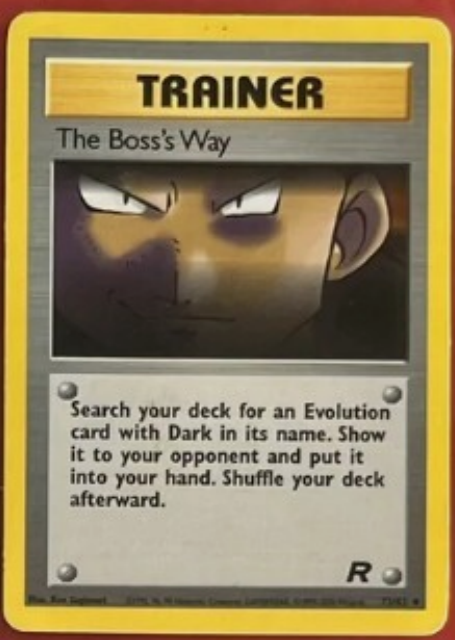

tensor([4], device='cuda:0')
Predicted class: base5


In [ ]:
def load_random_image(input_path: str = './some-random-pics') -> Image.Image:
    png_files = [f for f in os.listdir(input_path) if f.lower().endswith('.png')]
    random_file = random.choice(png_files)
    print(f"Loading image: {random_file}")
    image_path = os.path.join(input_path, random_file)
    image = Image.open(image_path)
    display(image)
    return image.convert('RGB')

input_image = load_random_image()
transform = transforms.Compose([
    transforms.Resize((342, 245)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])
tensor_image = transform(input_image).unsqueeze(0).to(device)
model.eval()
with torch.no_grad():
    output = model(tensor_image)
    predicted_class = torch.argmax(output, dim=1)
print(predicted_class)

with open('class_to_idx.json', 'r') as f:
    class_to_idx = json.load(f)
idx_to_class = {v: k for k, v in class_to_idx.items()}
print(f"Predicted class: {idx_to_class[predicted_class.item()]}")